1. What does RGBA stand for?

RGBA stands for red, green, blue, alpha. It's a system for describing colors used in computer graphics and web design.

- Red, green, and blue are the same as the basic colors used in light and pigment mixing. By combining these in various proportions, you can create a wide range of colors.
- Alpha refers to the opacity of the color. A value of 0 for alpha indicates completely transparent, while 1 represents fully opaque. Values between 0 and 1 specify various degrees of transparency.

2. From the Pillow module, how do you get the RGBA value of any images?

You can use the getdata method of the Pillow Image object to access the RGBA values of each pixel in an image. Here's how to do it:

In [ ]:
from PIL import Image

# Open the image
img = Image.open("path/to/your/image.png")

# Convert the image to RGBA mode (if necessary)
if img.mode != 'RGBA':
  img = img.convert('RGBA')

# Get the pixel data
pixels = img.getdata()

# Each element in pixels is a tuple representing (R, G, B, A) values
for pixel in pixels:
  red, green, blue, alpha = pixel
  # Do something with the RGBA values (e.g., print them)
  print(f"Red: {red}, Green: {green}, Blue: {blue}, Alpha: {alpha}")


Explanation:

1. Import Image: We import the Image class from the Pillow library.
Open the image: We use Image.open to open the image file from a specified path.
2. Convert to RGBA (if needed): The getdata method works best with RGBA mode images. This code checks the image mode and converts it to RGBA if necessary.
3. Get pixel data: The getdata method returns a flat sequence of all pixel values in the image.
4. Iterate and access RGBA: We iterate through each pixel, which is a tuple containing four values: red, green, blue, and alpha. You can then use these values for further processing.

3. What is a box tuple, and how does it work?

A box tuple in Python refers to a specific type of tuple used in certain libraries like Pillow (PIL Fork). It's not a general Python data structure concept. Here's how it works:

**Purpose:**

- Box tuples represent a rectangular region within an image.
- They are used by functions or methods that operate on specific image areas.

**Structure**:

- A box tuple is a tuple containing four integer values.
- The order represents:
  - Left (X coordinate): The x-coordinate of the top-left corner of the rectangle.
  - Top (Y coordinate): The y-coordinate of the top-left corner of the rectangle.
  - Right (X coordinate): The x-coordinate of the pixel to the right of the bottom-right corner (but not included itself).
  - Bottom (Y coordinate): The y-coordinate of the pixel below the bottom-right corner (but not included itself).

**Example**:
```Python
box_tuple = (10, 20, 50, 70)
```

- This box tuple represents a rectangle starting at pixel (10, 20) and ending at pixel (49, 69).
- Note that the bottom-right corner pixel is not included in the selection.

**Key Points**:

- Box tuples ensure the selected area is a valid rectangle by requiring the right and bottom coordinates to be greater than their respective left and top values.
- This format helps functions accurately define the region of interest within an image.

**Libraries using box tuples**:

1. Pillow (PIL Fork): The crop method and functions like frombytes use box tuples to specify the cropping area.

In summary, box tuples are a specific use case of tuples in image processing libraries. They provide a structured way to define rectangular regions within an image.

4. Use your image and load in notebook then, How can you find out the width and height of an Image object?

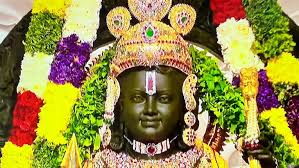

In [1]:
from PIL import Image

img = Image.open('/content/LordRam.jpeg')
img

In [2]:
# Method 1
width = img.width
height = img.height

print(f"Image width: {width} pixels")
print(f"Image height: {height} pixels")

Image width: 299 pixels
Image height: 168 pixels


In [4]:
# Method 2
size = img.size

print(f"Image size: {size} (width, height)")

# Access width and height individually from the tuple
image_width, image_height = size

print(f"Image width: {image_width} pixels")
print(f"Image height: {image_height} pixels")


Image size: (299, 168) (width, height)
Image width: 299 pixels
Image height: 168 pixels


5. What method would you call to get Image object for a 100×100 image, excluding the lower-left quarter of it?

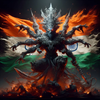

In [6]:
img_india = Image.open('/content/india.png')
img_india

<ipython-input-5-c04335c71fad>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = cropped_img.resize(target_size, Image.ANTIALIAS)


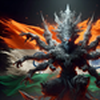

In [5]:
from PIL import Image

def get_cropped_image(image_path, target_size=(100, 100)):
  """
  This function opens an image, crops the lower-left quarter, and resizes
  it to the target size. It returns a new Image object.
  """
  # Open the image
  img = Image.open(image_path)

  # Get original dimensions
  width, height = img.size

  # Calculate the area to exclude (lower-left quarter)
  exclusion_width = int(width * 0.25)
  exclusion_height = int(height * 0.25)

  # Define the crop box (exclude lower-left quarter)
  crop_box = (0, 0, width - exclusion_width, height - exclusion_height)

  # Crop the image
  cropped_img = img.crop(crop_box)

  # Resize the cropped image (optional)
  resized_img = cropped_img.resize(target_size, Image.ANTIALIAS)

  return resized_img

# Example usage
image_path = "/content/india.png"
cropped_image = get_cropped_image(image_path)

cropped_image


In [8]:
cropped_image.save("modified_image.png", format="PNG")

In [9]:
!pwd

/content


6. After making changes to an Image object, how could you save it as an image file?

In [ ]:
# Assuming you have a modified Image object named 'modified_image'

# Specify the filename and format (optional)
modified_image.save("modified_image.jpg", format="JPEG")

# You can also save to a different format by specifying it
modified_image.save("modified_image.png", format="PNG")

# If the format is not specified, it will be inferred from the filename extension (if possible)
modified_image.save("output_image")  # Might use format based on extension (e.g., .jpg for JPEG)


7. What module contains Pillow’s shape-drawing code?

Pillow's shape-drawing functionalities are directly available in the ImageDraw module. You don't need to import any separate module for drawing shapes.

Here's how it works:

1. Import libraries:

In [ ]:
from PIL import Image, ImageDraw

2. Create an Image object:

In [ ]:
img = Image.new("RGB", (width, height))  # Replace with desired dimensions and mode

3. Create an ImageDraw object:

In [ ]:
draw = ImageDraw.Draw(img)

4. Use drawing methods:

The ImageDraw object provides various methods for drawing shapes like:

 - `point(xy, fill)`: Draws a single pixel at the given coordinates.
  - `line(xy, fill, width)`: Draws a line segment between the given coordinates.
  - `rectangle(xy, fill, outline, width)`: Draws a rectangle defined by the box tuple `xy`.
  - `ellipse(xy, fill, outline, width)`: Draws an ellipse (oval) defined by the box tuple `xy`.
  - `polygon(xy, fill, outline, width)`: Draws a polygon with the given vertices specified in `xy`.

8. Image objects do not have drawing methods. What kind of object does? How do you get this kind of object?

The object that allows you to draw on an image in Pillow is an ImageDraw object.

Here's how you can get an ImageDraw object to draw on an image:

In [10]:
# Import libraries:
from PIL import Image, ImageDraw

# Create an Image object:
img = Image.open("/content/LordRam.jpeg")

# Create an ImageDraw object:
draw = ImageDraw.Draw(img)


Now, the draw object will have the methods for drawing various shapes and lines on the image. You can use methods like line, rectangle, ellipse, polygon, and many more. These methods take arguments like coordinates, fill color, outline color, and line width to define the shape you want to draw.

In [11]:
# Draw a red rectangle
draw.rectangle((50, 50, 150, 150), fill="red")

# Draw a blue line
draw.line((20, 20, 180, 180), fill="blue", width=5)

# Save the modified image
img.save("drawn_image.jpg")

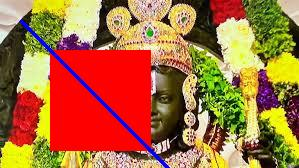

In [12]:
drawn_image = Image.open('/content/drawn_image.jpg')
drawn_image